In [ ]:
# 배열
import numpy as np

# 데이터 분석
import pandas as pd

In [ ]:
# Pandas option 정의
pd.set_option( 'display.max_columns', 20 )
pd.set_option( 'display.max_colwidth', 20 )
pd.set_option( 'display.unicode.east_asian_width', True )

In [ ]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Jupyter note상에 그래프 결과 포함 매직 명령
%matplotlib inline

# Matplotlib 기본 글꼴 정의
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [ ]:
import sys

# 노트북이 코랩에서 실행 중인지 체크합니다.
if 'google.colab' in sys.modules:
    !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections

    # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

#     # 나눔바른고딕 폰트로 설정합니다.
    import matplotlib.pyplot as plt
    plt.rc('font', family='NanumBarunGothic')

#     # 마이너스 기호 표시 오류 수정
    import matplotlib
    matplotlib.rcParams['axes.unicode_minus'] = False

Selecting previously unselected package fonts-nanum.
(Reading database ... 123588 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
# 경고 문제 출력 제한
import warnings

warnings.filterwarnings( 'ignore' )

In [ ]:
# Tensorflow
import tensorflow as tf

!pip install tensorflow==2.13.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 29.3 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: keras
    Found exist

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.13.1


In [ ]:
# Tensorflow Sequential model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras.layers import Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.layers import SimpleRNN, LSTM, Bidirectional, GRU

from tensorflow.keras import optimizers, regularizers

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

from tensorflow.keras.utils import plot_model

In [ ]:
# 데이터 분리를 위한 함수
from sklearn.model_selection import train_test_split

In [ ]:
def disp_training( history ):
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range( 1, len( accuracy ) + 1 )

    plt.title( '훈련 및 검증 정확도' )
    plt.plot( epochs, history.history[ 'accuracy' ], label = 'accuracy' )
    plt.plot( epochs, history.history[ 'val_accuracy' ], label = 'val_accuracy' )
    plt.grid()
    plt.legend()
    plt.xlabel( 'Epochs' )

    plt.figure()
    plt.title( '훈련 및 검증 오차' )

    plt.plot( epochs, history.history[ 'loss' ], label = 'loss' )
    plt.plot( epochs, history.history[ 'val_loss' ], label = 'val_loss' )
    plt.grid()
    plt.legend()
    plt.xlabel( 'Epochs' )

    plt.show()

In [ ]:
def disp_loss( history ):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range( 1, len( loss ) + 1 )

    plt.title( '훈련 및 검증 오차' )

    plt.plot( epochs, history.history[ 'loss' ], label = 'loss' )
    plt.plot( epochs, history.history[ 'val_loss' ], label = 'val_loss' )
    plt.grid()
    plt.legend()
    plt.xlabel( 'Epochs' )

    plt.show()

In [ ]:
import glob

# 파일 경로 리스트
train_data_list = sorted(glob.glob('/content/train_input/*.csv'))
train_target_list = sorted(glob.glob('/content/train_target/*.csv'))
test_data_list = sorted(glob.glob('/content/test_input/*.csv'))
submission_df = sorted(glob.glob('/content/test_target/*.csv'))

# 데이터 로드 함수'
def load_data(file_paths):
    dataframes = [pd.read_csv(file_path) for file_path in file_paths]
    return dataframes

# 데이터 로드
input_dataframes = load_data(train_data_list)
target_dataframes = load_data(train_target_list)
test_dataframes = load_data(test_data_list)
submission_df = load_data(submission_df)

# 첫 번째 데이터프레임 확인
print(input_dataframes[0].head())
print(target_dataframes[0].head())


   DAT obs_time  내부온도관측치  내부습도관측치   co2관측치  ec관측치  \
0    0    00:00       25.300000       81.835000  536.016667  1.407439   
1    0    01:00       25.680357       81.264286  528.696429  1.409003   
2    0    02:00       25.273333       81.471666  532.833333  1.406913   
3    0    03:00       25.355000       81.398334  545.566667  1.406689   
4    0    04:00       25.391667       81.483333  558.583333  1.411070   

   시간당분무량  일간누적분무량  시간당백색광량  일간누적백색광량  \
0           0.0             0.0             0.0               0.0   
1         126.0           126.0             0.0               0.0   
2           0.0           126.0             0.0               0.0   
3         126.0           252.0             0.0               0.0   
4           0.0           252.0             0.0               0.0   

   시간당적색광량  일간누적적색광량  시간당청색광량  일간누적청색광량  \
0             0.0               0.0               0                 0   
1             0.0               0.0               0                 0   
2    

In [ ]:
from re import sub
def preprocess_data(input_df, target_df):
    # 필요 없는 칼럼 제거
    input_df = input_df.drop(columns=['obs_time'])

    # 열 타입 변환
    for col in input_df.columns:
        input_df[col] = pd.to_numeric(input_df[col], errors='coerce')

    # 시간 데이터를 일 단위로 변환
    input_df['day'] = input_df['DAT']

    # 일 단위로 평균내기
    daily_avg = input_df.groupby('day').mean().reset_index()

    # 필요 없는 칼럼 제거
    X = daily_avg.drop(columns=['DAT','day'])  # 환경 데이터
    y = target_df['predicted_weight_g']  # 목표 데이터

    # 데이터 정규화 (예시: Min-Max Scaling)
    X = (X - X.min()) / (X.max() - X.min())

    return X, y

# 전처리된 데이터 저장
preprocessed_data = [preprocess_data(input_df, target_df) for input_df, target_df in zip(input_dataframes, target_dataframes)]
preproecssed_data_test = [preprocess_data(input_df,target_df) for input_df, target_df in zip(test_dataframes, submission_df)]

In [ ]:
# 전처리된 데이터 확인
print("전처리된 첫 번째 케이스의 X 데이터:")
print(preprocessed_data[0][0].head())

print("전처리된 첫 번째 케이스의 y 데이터:")
print(preprocessed_data[0][1].head())


전처리된 첫 번째 케이스의 X 데이터:
   내부온도관측치  내부습도관측치  co2관측치  ec관측치  시간당분무량  \
0        0.466759        0.112226   0.059016  0.862491      0.457619   
1        0.611131        0.114446   0.025220  0.856806      0.521190   
2        0.367447        0.036154   0.071617  0.861952      0.894048   
3        0.220508        0.000000   0.743750  0.867245      0.521190   
4        0.323577        0.123585   0.072529  0.868792      0.372858   

   일간누적분무량  시간당백색광량  일간누적백색광량  시간당적색광량  \
0        0.553568        0.528217          0.639587        0.863636   
1        0.813523        1.000000          1.000000        1.000000   
2        0.902282        0.562077          0.598646        0.545455   
3        0.813523        1.000000          1.000000        1.000000   
4        0.204338        0.638826          0.632818        0.636364   

   일간누적적색광량  시간당청색광량  일간누적청색광량  시간당총광량  \
0          0.959732             NaN               NaN      0.545136   
1          1.000000             NaN               NaN      1

In [ ]:
# 튜플 풀어서 리스트로 변환
X_data = [x for x, y in preprocessed_data]
y_data = [y for x, y in preprocessed_data]
X_submmit = [x for x, y in preproecssed_data_test]
y_submmit = [y for x, y in preproecssed_data_test]

In [ ]:
# 모든 케이스의 데이터를 하나의 데이터셋으로 결합
X_combined = pd.concat(X_data, ignore_index=True)
X_combined.fillna(0, inplace=True)
y_combined = pd.concat(y_data, ignore_index=True)
input_dataframes_obs = pd.concat(input_dataframes, ignore_index=True)

X_combined_test = pd.concat(X_submmit, ignore_index=True)
X_combined_test.fillna(0, inplace=True)
y_combined_test = pd.concat(y_submmit, ignore_index=True)
input_dataframes_obs_test = pd.concat(test_dataframes, ignore_index=True)

In [ ]:
input_dataframes_obs = input_dataframes_obs[(input_dataframes_obs['obs_time'] == '23:00') | (input_dataframes_obs['obs_time'] == '23:00:00.') | (input_dataframes_obs['obs_time'] == '22:59:59.')]
input_dataframes_obs_test = input_dataframes_obs_test[(input_dataframes_obs_test['obs_time'] == '23:00') | (input_dataframes_obs_test['obs_time'] == '23:00:00.') | (input_dataframes_obs_test['obs_time'] == '22:59:59.')]

In [ ]:
X_combined.reset_index(drop=True, inplace=True)
input_dataframes_obs.reset_index(drop=True, inplace=True)

X_combined_test.reset_index(drop=True, inplace=True)
input_dataframes_obs_test.reset_index(drop=True, inplace=True)

In [ ]:
X_combined = pd.concat([input_dataframes_obs['DAT'],X_combined],axis=1)
X_combined_test = pd.concat([input_dataframes_obs_test['DAT'],X_combined_test],axis=1)

In [ ]:
X_combined

,DAT,내부온도관측치,내부습도관측치,co2관측치,ec관측치,시간당분무량,일간누적분무량,시간당백색광량,일간누적백색광량,시간당적색광량,일간누적적색광량,시간당청색광량,일간누적청색광량,시간당총광량,일간누적총광량
0,0,0.466759,0.112226,0.059016,0.862491,0.457619,0.553568,0.528217,0.639587,0.863636,0.959732,0.000000,0.000000,0.545136,0.655063
1,1,0.611131,0.114446,0.025220,0.856806,0.521190,0.813523,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
2,2,0.367447,0.036154,0.071617,0.861952,0.894048,0.902282,0.562077,0.598646,0.545455,0.557047,0.000000,0.000000,0.561238,0.596415
3,3,0.220508,0.000000,0.743750,0.867245,0.521190,0.813523,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
4,4,0.323577,0.123585,0.072529,0.868792,0.372858,0.204338,0.638826,0.632818,0.636364,0.610738,0.000000,0.000000,0.638702,0.631557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,23,0.390996,0.712151,0.318592,0.832426,0.688024,0.926442,0.080674,0.046570,0.575481,0.543448,0.574944,0.543368,0.112173,0.064758
780,24,0.044833,0.946153,0.278304,0.990430,0.018304,0.020618,0.536779,0.536690,1.000000,1.000000,1.000000,1.000000,0.747554,0.747357
781,25,0.000000,1.000000,0.327414,1.000000,0.010219,0.005196,0.536711,0.535741,0.999111,0.998036,0.999254,0.998167,0.747245,0.745750
782,26,0.073335,0.979149,0.139943,0.904797,0.000000,0.003695,0.536825,0.535884,0.996741,0.995333,0.997166,0.995875,0.746748,0.745208


In [ ]:
X_combined.drop(['시간당백색광량','시간당적색광량','시간당청색광량','시간당총광량'], axis=1, inplace=True)
X_combined_test.drop(['시간당백색광량','시간당적색광량','시간당청색광량','시간당총광량'], axis=1, inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

In [ ]:
# LSTM 입력 형태 맞추기
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
X_combined_test = np.expand_dims(X_combined_test, axis=-1)

In [ ]:
# 모델 정의 함수
def define_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error',metrics = ['mean_absolute_error'])
    return model

In [ ]:
# 모델 정의
model = define_model((X_train.shape[1], 1))

In [ ]:
# 모델 학습 함수
def train_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
    return model

In [ ]:
# 모델 평가 함수
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    return rmse, y_pred

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 11, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 11, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 11, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 11, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 11, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 11, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [ ]:
model.fit(X_train, y_train,  epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
16/16 [==============================] - 19s 230ms/step - loss: 2873.6929 - mean_absolute_error: 33.8900 - val_loss: 2453.0732 - val_mean_absolute_error: 31.4078
Epoch 2/50
16/16 [==============================] - 1s 46ms/step - loss: 2414.4812 - mean_absolute_error: 29.7888 - val_loss: 1876.8688 - val_mean_absolute_error: 28.9467
Epoch 3/50
16/16 [==============================] - 1s 51ms/step - loss: 1890.7863 - mean_absolute_error: 30.2911 - val_loss: 1557.6832 - val_mean_absolute_error: 30.0788
Epoch 4/50
16/16 [==============================] - 1s 49ms/step - loss: 1769.0038 - mean_absolute_error: 33.8169 - val_loss: 1564.4089 - val_mean_absolute_error: 31.6453
Epoch 5/50
16/16 [==============================] - 1s 43ms/step - loss: 1771.8448 - mean_absolute_error: 33.1144 - val_loss: 1555.9553 - val_mean_absolute_error: 30.2245
Epoch 6/50
16/16 [==============================] - 1s 32ms/step - loss: 1750.6863 - mean_absolute_error: 32.4784 - val_loss: 1553.8986 - val_m

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# 모델 평가 함수
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    return rmse, y_pred

In [ ]:
# 모델 평가
rmse, y_pred = evaluate_model(model, X_test, y_test)
print(f'RMSE: {rmse}')

5/5 [==============================] - 2s 10ms/step
RMSE: 29.975556071653795


In [ ]:
# 결과 시각화 함수
def plot_results(y_test, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.xlabel('Days')
    plt.ylabel('Leaf Weight (g)')
    plt.title(title)
    plt.legend()
    plt.show()

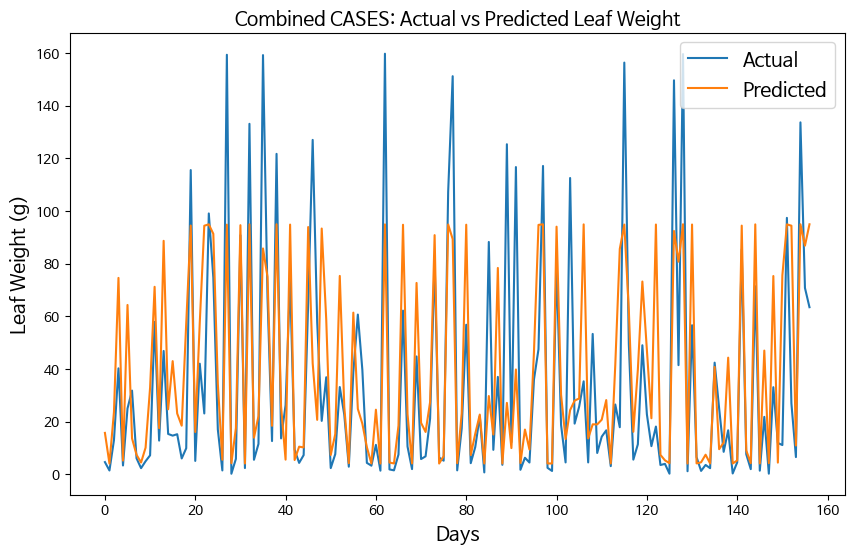

In [ ]:
# 결과 시각화
plot_results(y_test, y_pred, 'Combined CASES: Actual vs Predicted Leaf Weight')

In [ ]:
model.save('model_lstm_classic.h5')

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 평가
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

# RMSE 계산
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(f"Train MAE: {train_mae:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Train MAE: 19.3583
Test MAE: 20.0347
Train RMSE: 28.3129
Test RMSE: 29.9756


In [ ]:
# 예측
predictions = model.predict(X_combined_test)


5/5 [==============================] - 0s 8ms/step


In [ ]:
# 예측 결과 저장
submission_df[0]['predicted_weight_g'] = predictions[0:28]
submission_df[1]['predicted_weight_g'] = predictions[28:56]
submission_df[2]['predicted_weight_g'] = predictions[56:84]
submission_df[3]['predicted_weight_g'] = predictions[84:112]
submission_df[4]['predicted_weight_g'] = predictions[112:140]

NameError: name 'predictions' is not defined

In [ ]:
# 저장된 파일 읽기
submission_df[0].to_csv('TEST_01.csv', index=False)
submission_df[1].to_csv('TEST_02.csv', index=False)
submission_df[2].to_csv('TEST_03.csv', index=False)
submission_df[3].to_csv('TEST_04.csv', index=False)
submission_df[4].to_csv('TEST_05.csv', index=False)

In [ ]:
from google.colab import files

# 파일 다운로드
files.download('TEST_01.csv')
files.download('TEST_02.csv')
files.download('TEST_03.csv')
files.download('TEST_04.csv')
files.download('TEST_05.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>